#Archisha Sinha

##Domain: Computer Vision
##Topic: Stereo Images and Depth of Image

## Experiment 10: Estimate depth of objects for the given stereo images

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from google.colab.patches import cv2_imshow

Read the images

In [31]:
left_image = cv2.imread('/content/left_image.JPG')
right_image = cv2.imread('/content/right_image.JPG')

Convert images from BGR to RGB

In [32]:
image_left = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB)
image_right = cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB)

Show the images using Subplot

Text(0.5, 1.0, 'Right Image')

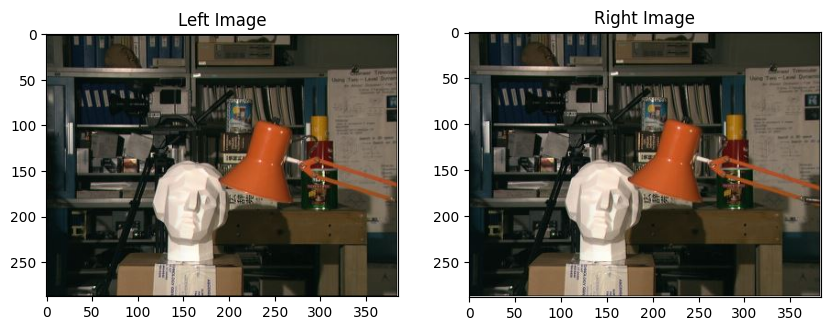

In [33]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_left)
plt.title('Left Image')
plt.subplot(1, 2, 2)
plt.imshow(image_right)
plt.title('Right Image')

Converting both image to same sizes

In [34]:
#Considering left image as benchmark and then we convert right image to the same size as left

shape = image_left.shape
image_right = cv2.resize(image_right, (shape[1], shape[0]))

In [35]:
print(image_left.shape)
print(image_right.shape)

(287, 386, 3)
(287, 386, 3)


Text(0.5, 1.0, 'Right Image')

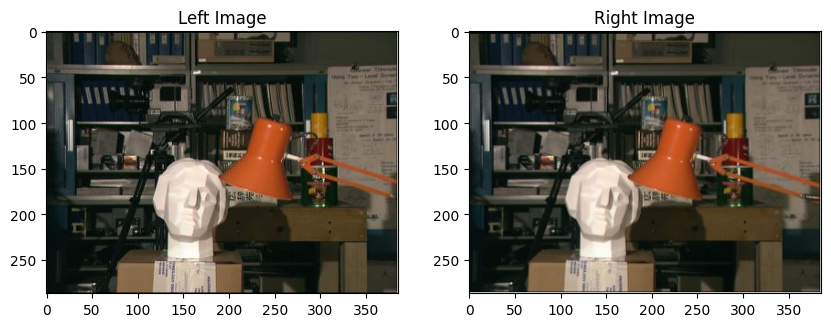

In [36]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_left)
plt.title('Left Image')
plt.subplot(1, 2, 2)
plt.imshow(image_right)
plt.title('Right Image')

Converting images to Gray

In [37]:
image_left_gray = rgb2gray(image_left)
image_right_gray = rgb2gray(image_right)

Text(0.5, 1.0, 'Right Gray Image')

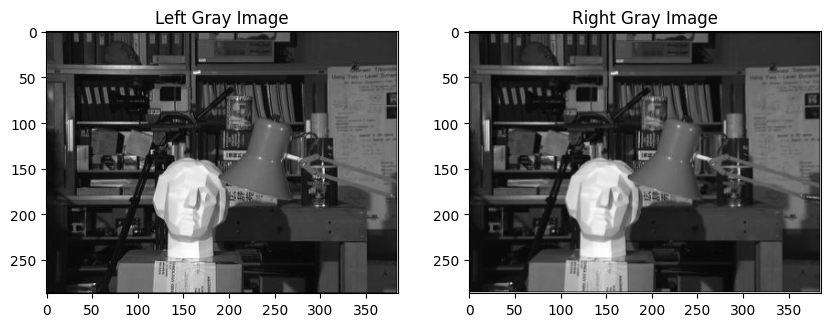

In [38]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_left_gray, cmap='gray')
plt.title('Left Gray Image')
plt.subplot(1, 2, 2)
plt.imshow(image_right_gray, cmap='gray')
plt.title('Right Gray Image')

Invoking function that usues Disparity, to determine depth

In [44]:
# Converting images to Gray and scaling to uint8
image_left_gray = (rgb2gray(image_left) * 255).astype(np.uint8)
image_right_gray = (rgb2gray(image_right) * 255).astype(np.uint8)

# Invoking function that uses Disparity to determine depth
stereo = cv2.StereoBM_create(numDisparities=32, blockSize=31)  # 16 disparity levels
depth_image = stereo.compute(image_left_gray, image_right_gray)  # 8 bits unsigned integer

Text(0.5, 1.0, 'Depth Image')

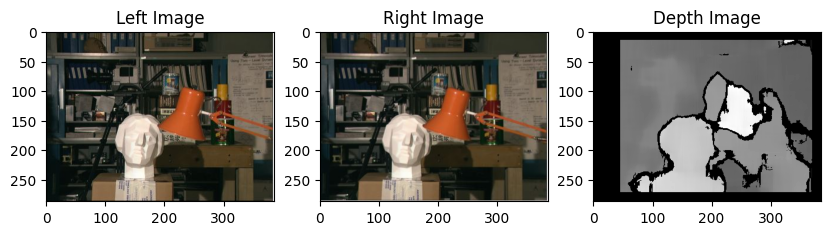

In [45]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_left)
plt.title('Left Image')
plt.subplot(1, 3, 2)
plt.imshow(image_right)
plt.title('Right Image')
plt.subplot(1, 3, 3)
plt.imshow(depth_image, cmap='gray')
plt.title('Depth Image')

### Inference:

- In depth image, something which is near to camera it is showing in light colour
- If we inc the disparity from 16 to 32, then the depth is getting dark
- If we inc the blocksize from 15 to 31 then the depth image is getting less pixelated


Conclusion
- For the given stereo rectified images,top 16 disparities and blocksize of 15 are considered to calculate the depth of the objects in the given images.
- If number of disparities is inc to 32 from 16, the results show that the final details of depth.
- When blocksize is varied from 15x15 to 7x7, then the depth map shows depth of smaller objects.
- If blocksize is increased from 7x7 to 31x31, then the depth of the larger objects like table lamp is shown in the results.